In [1]:
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import os
import matplotlib.pyplot as plt
import numpy as np

augmentation = iaa.Sequential([
    iaa.WithColorspace(to_colorspace="HSV", from_colorspace="RGB", children=[
        iaa.WithChannels([0,1], iaa.Multiply((0.5, 1.5))),
        iaa.WithChannels(2, iaa.Multiply((0.7, 1.3)))
    ]),
    iaa.OneOf([
        iaa.Flipud(1),
        iaa.Affine(rotate=180)]
    ),
    iaa.OneOf([
        iaa.Affine(rotate=90),
        iaa.Affine(rotate=270)]
    ),
    iaa.Affine(rotate=iap.Uniform(0, 360))
])
fns = os.listdir('data/processedBuildingLabels/3band')

# 'images' should be either a 4D numpy array of shape (N, height, width, channels)
# or a list of 3D numpy arrays, each having shape (height, width, channels).
# Grayscale images must have shape (height, width, 1) each.
# All images must have numpy's dtype uint8. Values are expected to be in
# range 0-255.
images = []
for fn in fns[:10]:
    image = plt.imread(f'data/processedBuildingLabels/3band/{fn}')
    # Assume image will already be cropped to 320x320.
    image = image[:320, :320, :]
    images.append(image)
images = np.array(images)
print(images.shape)
images_aug = augmentation.augment_images(images)
print(images_aug.shape)

(10, 320, 320, 3)
(10, 320, 320, 3)


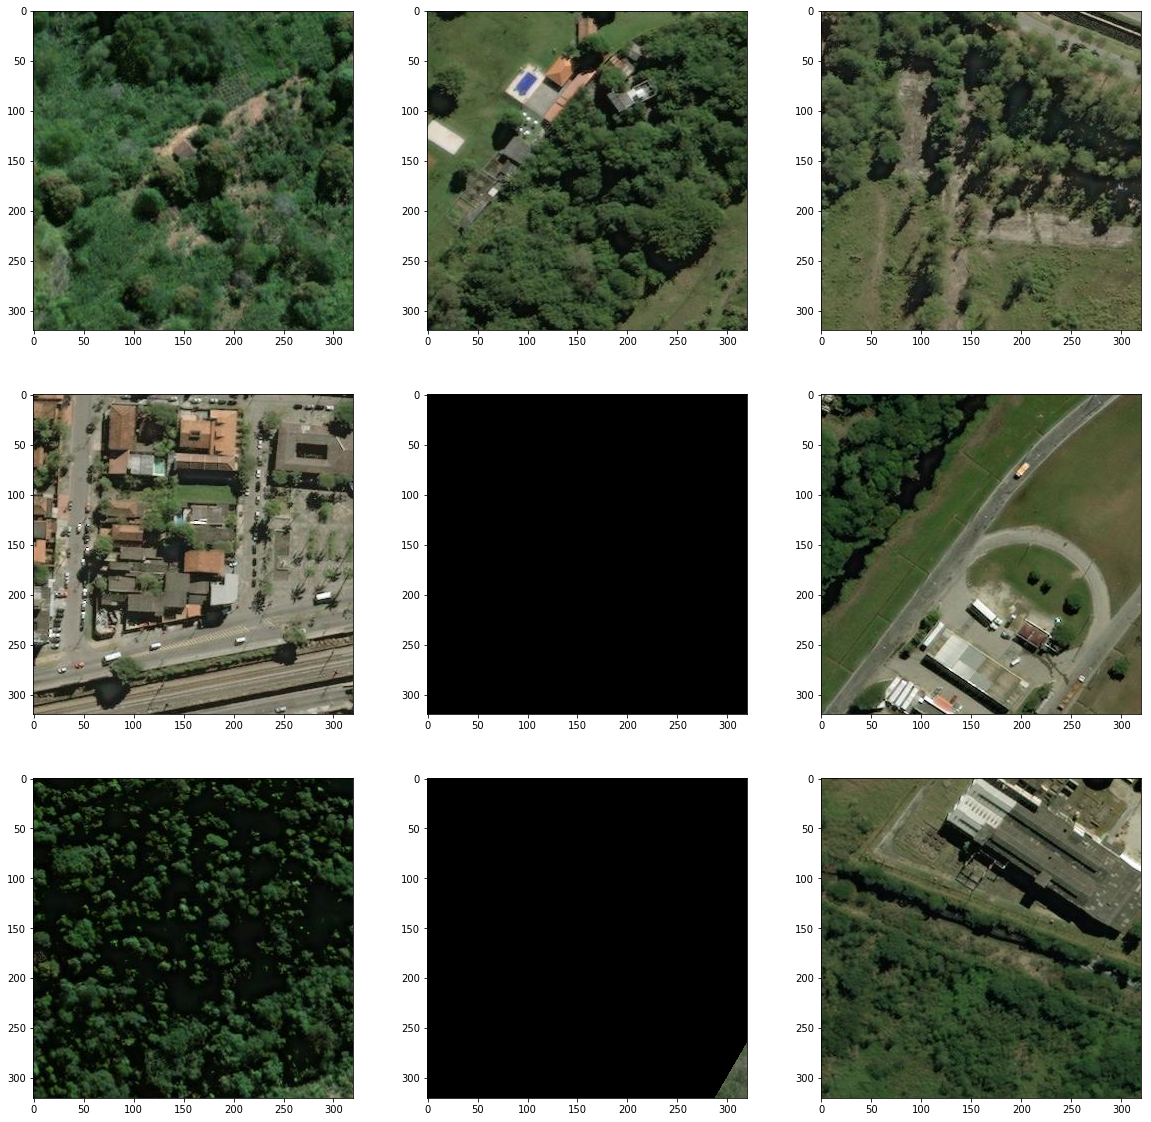

In [2]:
plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(images[i])

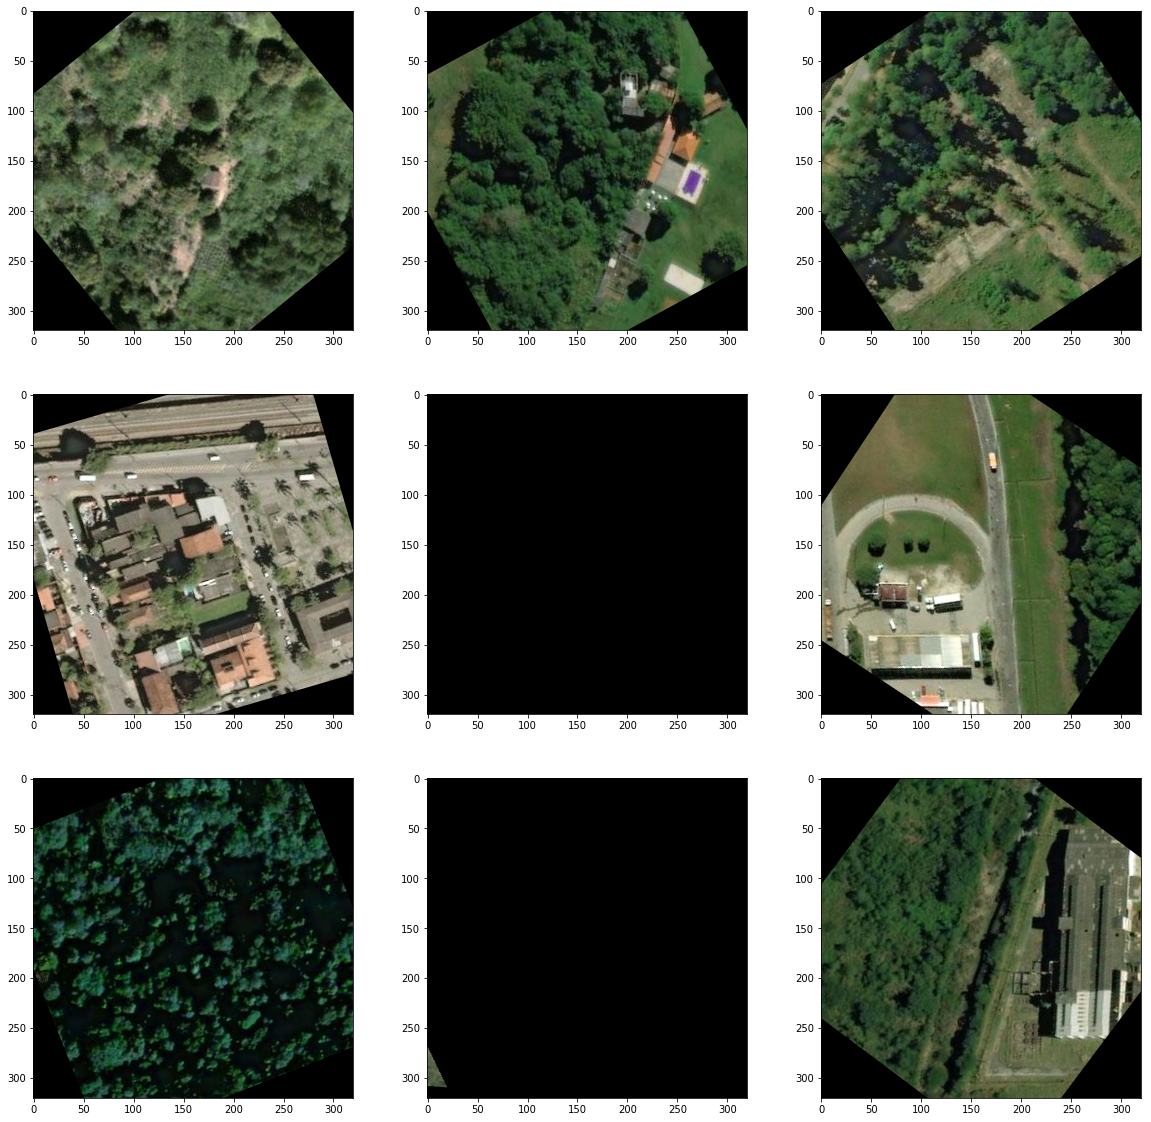

In [3]:
plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(images_aug[i])